# Dependency code

In [1]:
%run ../lib/cmdbench/bioinformatics/multibench.py

COBS will have to be built directly from source <https://github.com/bingmann/cobs>. Version used is commit `7c030bbb4804b142f4336a1808af1095d9398f4a`.

# Benchmarking

In [2]:
import sys
import os
import shutil
import numpy as np
import glob
import cmdbench

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
            
def reset_func():
    clean_if_exists("cobs-data/samples/")
    clean_if_exists("cobs-data/example.cobs_compact")
    clean_if_exists("cobs-data/example.cobs_compact.tmp")
            
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

def create_folder_if_doesnt_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

input_dir = 'input'

input_files_1 = [os.path.basename(f) for f in glob.glob(f'{input_dir}/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_files_1]
print(input_samples)

['D7331', '2014D-0189', 'D7321', 'PNUSA000195', 'PNUSA000196', 'D7323', '2014D-0070', '2014D-0068', 'D7333', 'D7320', 'D7327', 'D7330', 'D5663', 'D7329', 'D7316', '2014D-0067', 'D7322', 'D7324', 'D7328', 'PNUSA000194', 'D7319', 'D7334']


In [3]:
create_folder_if_doesnt_exist("cobs-data")
create_folder_if_doesnt_exist("cobs-data/samples")

In [4]:
nproc=4
kmer=31
hashes=3

sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

def sampling_func(sample_size):
    # Copy files we want to be part of the sample
    # from inputs to cobs-data/samples/ and return their path
    samples = input_samples[:sample_size]
    samples_out = []
    for sample in samples:
        infile1, infile2 = os.path.abspath(f"{input_dir}/{sample}_1.fastq.gz"), os.path.abspath(f"{input_dir}/{sample}_2.fastq.gz")
        outfile1, outfile2 = f"cobs-data/samples/{sample}_1.fastq.gz", f"cobs-data/samples/{sample}_2.fastq.gz"
        os.symlink(infile1, outfile1)
        os.symlink(infile2, outfile2)
    return ["cobs-data/samples/"]

build_command = {
    "command": f"cobs compact-construct -k {kmer} --threads {nproc} --num-hashes {hashes} cobs-data/samples/ cobs-data/example.cobs_compact",
}

query_repeat_count = 2
query_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG"

query_command = {
    "command": "cobs query -i cobs-data/example.cobs_compact %",
    "parallel_argfiles": [query_sequence] * query_repeat_count,
    "parallel_args": f"-j {nproc} -I%"
}

multibench_results, debug_str = multi_cmdbench({
"index": [build_command],
"query": [query_command]
}, reset_func = reset_func, iterations = 1, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results=benchmark_list_to_results)


>>>>>>>>>>>>>
cobs compact-construct -k 31 --threads 4 --num-hashes 3 cobs-data/samples/ cobs-data/example.cobs_compact
STDOUT: --- document list (2 entries) ---

document[0] size 245279842 31-mers 326149811 : cobs-data/samples/D7331_1.fastq.gz : D7331_1

document[1] size 269274493 31-mers 326149811 : cobs-data/samples/D7331_2.fastq.gz : D7331_2

--- end of document list (2 entries) ---

documents: 2

minimum 31-mers: 326149811

maximum 31-mers: 326149811

average 31-mers: 326149811

total 31-mers: 652299622

STDERR: Parameters:

  input                      (string)            "cobs-data/samples/"

  out_file                   (string)            "cobs-data/example.cobs_compact"

Options:

  -C, --clobber              (bool)              false

      --continue             (bool)              false

  -f, --false-positive-rate  (double)            0.3

      --file-type            (string)            "any"

      --keep-temporary       (bool)              false

  -m, --memory        

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'memory': 5046272.0, 'disk_read': 514560544.0, 'disk_write': 61390.0, 'runtime': 5.04}, {'memory': 5070848.0, 'disk_read': 751587699.0, 'disk_write': 62168.0, 'runtime': 5.08}, {'memory': 5124096.0, 'disk_read': 1372007340.0, 'disk_write': 62897.0, 'runtime': 6.31}, {'memory': 5808128.0, 'disk_read': 1629130914.0, 'disk_write': 70707.0, 'runtime': 6.36}, {'memory': 5713920.0, 'disk_read': 1870889049.0, 'disk_write': 77988.0, 'runtime': 6.35}, {'memory': 5730304.0, 'disk_read': 2572187214.0, 'disk_write': 76206.0, 'runtime': 7.16}, {'memory': 6037504.0, 'disk_read': 2937051774.0, 'disk_write': 79722.0, 'runtime': 7.19}, {'memory': 6012928.0, 'disk_read': 3309147807.0, 'disk_write': 80390.0, 'runtime': 7.29}, {'memory': 6176768.0, 'disk_read': 3848123089.0, 'disk_write': 78832.0, 'runtime': 7.24}, {'memory': 6242304.0, 'disk_read': 4371508888.0, 'disk_write': 80010.0, 'runtime': 7.32}, {'memory': 6422528.0, 'disk_read': 4893999514.0, 'disk_write': 80180.0, 'runtime': 7.46}, {'memory': 

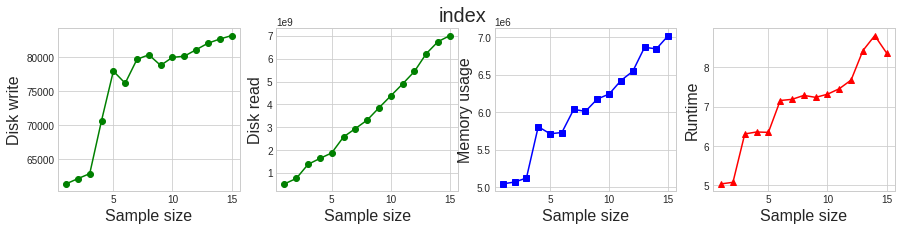

In [6]:
# Indexing Plots
plot_resources(multibench_results, sample_sizes, "index")

[{'memory': 27316224.0, 'disk_read': 1804862.0, 'disk_write': 601192.0, 'runtime': 0.33}, {'memory': 27443200.0, 'disk_read': 1804863.0, 'disk_write': 592999.0, 'runtime': 0.33}, {'memory': 27209728.0, 'disk_read': 1804864.0, 'disk_write': 592999.0, 'runtime': 0.33}, {'memory': 26972160.0, 'disk_read': 1804865.0, 'disk_write': 592999.0, 'runtime': 0.33}, {'memory': 27009024.0, 'disk_read': 1804867.0, 'disk_write': 592999.0, 'runtime': 0.36}, {'memory': 27250688.0, 'disk_read': 1804866.0, 'disk_write': 592999.0, 'runtime': 0.34}, {'memory': 27246592.0, 'disk_read': 1804861.0, 'disk_write': 592999.0, 'runtime': 0.35}, {'memory': 27406336.0, 'disk_read': 1804868.0, 'disk_write': 592999.0, 'runtime': 0.35}, {'memory': 27258880.0, 'disk_read': 1804866.0, 'disk_write': 592999.0, 'runtime': 0.33}, {'memory': 27299840.0, 'disk_read': 1804866.0, 'disk_write': 592999.0, 'runtime': 0.33}, {'memory': 27623424.0, 'disk_read': 1804865.0, 'disk_write': 592999.0, 'runtime': 0.35}, {'memory': 27365376.

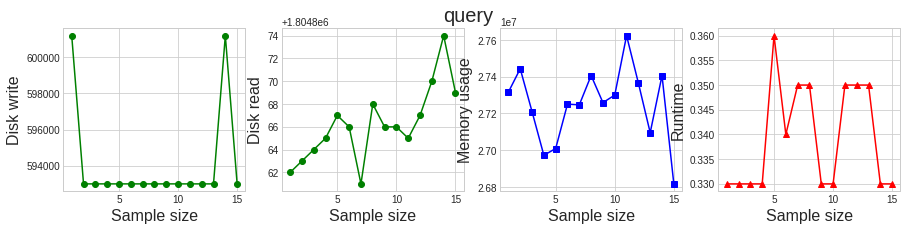

In [7]:
# Querying Plots
plot_resources(multibench_results, sample_sizes, "query")